In [2]:
#Task2: Unemployment Analysis  
#Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the Dataset
unemp = pd.read_csv(r"C:\Users\NIC\Desktop\DataScience\CodeAlpha\unemployment\Unemployment in India.csv")
unemp_covid = pd.read_csv(r"C:\Users\NIC\Desktop\DataScience\CodeAlpha\unemployment\Unemployment_Rate_upto_11_2020.csv")

In [4]:
#Data Exploration
print("Info Summary:")
unemp.info()

print("\nChecking missing value:")
unemp.isnull().sum()

Info Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB

Checking missing value:


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
print("Info Summary:")
unemp_covid.info()

print("\nChecking missing value:")
unemp_covid.isnull().sum()

Info Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB

Checking missing value:


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
unemp_covid.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [17]:
#Data Cleaning
#Rename Columns
unemp.columns = unemp.columns.str.strip()
unemp_covid.columns = unemp_covid.columns.str.strip()

#Convert Date Column
unemp['Date'] = pd.to_datetime(unemp['Date'], dayfirst=True)
unemp_covid['Date'] = pd.to_datetime(unemp_covid['Date'], dayfirst=True)

#Handling Missing Values
unemp.dropna(inplace=True)
unemp_covid.dropna(inplace=True)

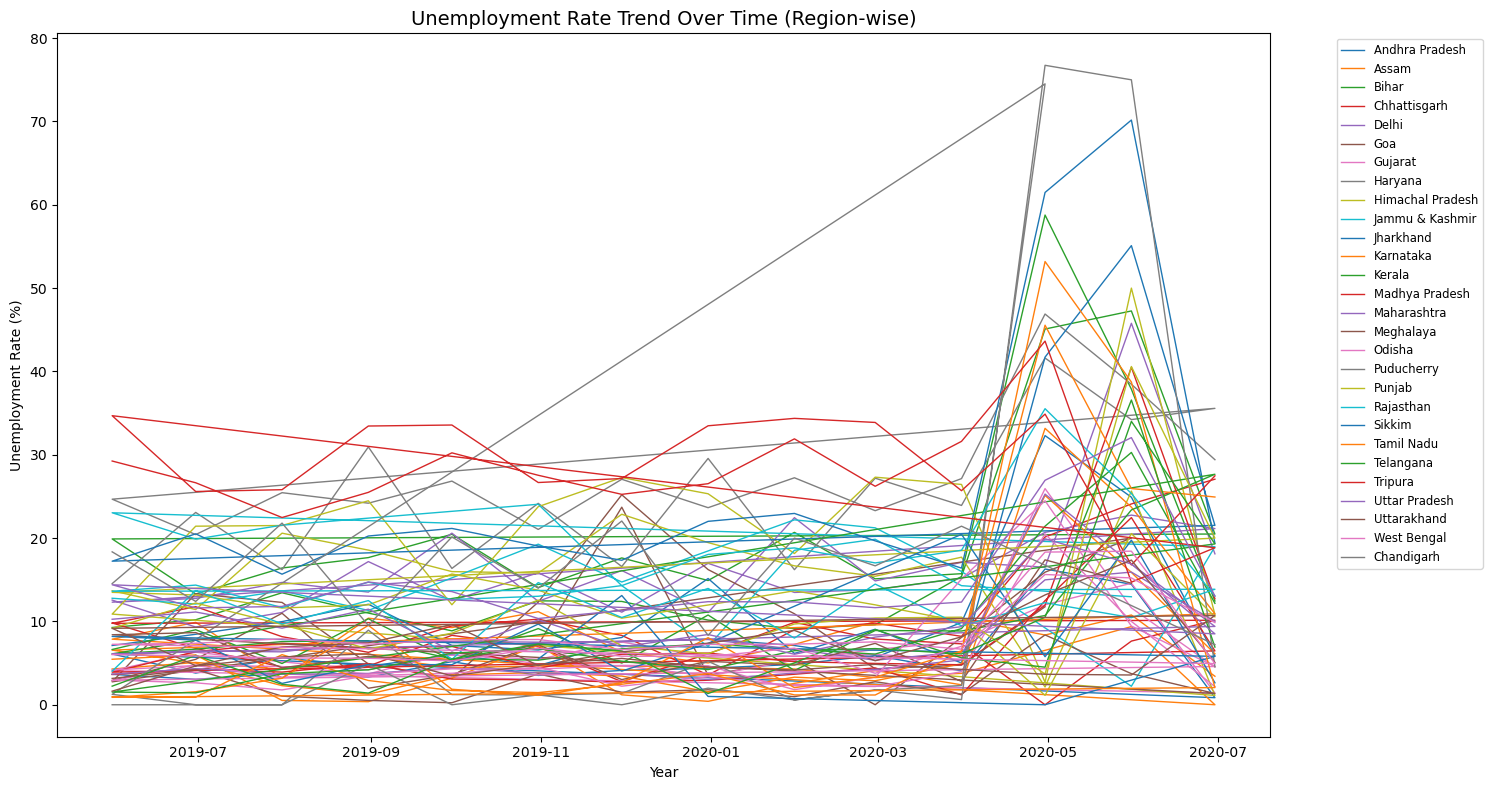

In [18]:
#Unemployment Trend Over Time
plt.figure(figsize=(15,8))
for region in unemp['Region'].unique():
    region_data = unemp[unemp['Region'] == region]
    plt.plot(
        region_data['Date'],
        region_data['Estimated Unemployment Rate (%)'],
        label=region, 
        linewidth=1
    )
plt.title('Unemployment Rate Trend Over Time (Region-wise)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

# Move legend outside (important when many regions)
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='small'
)

plt.tight_layout()
plt.show()

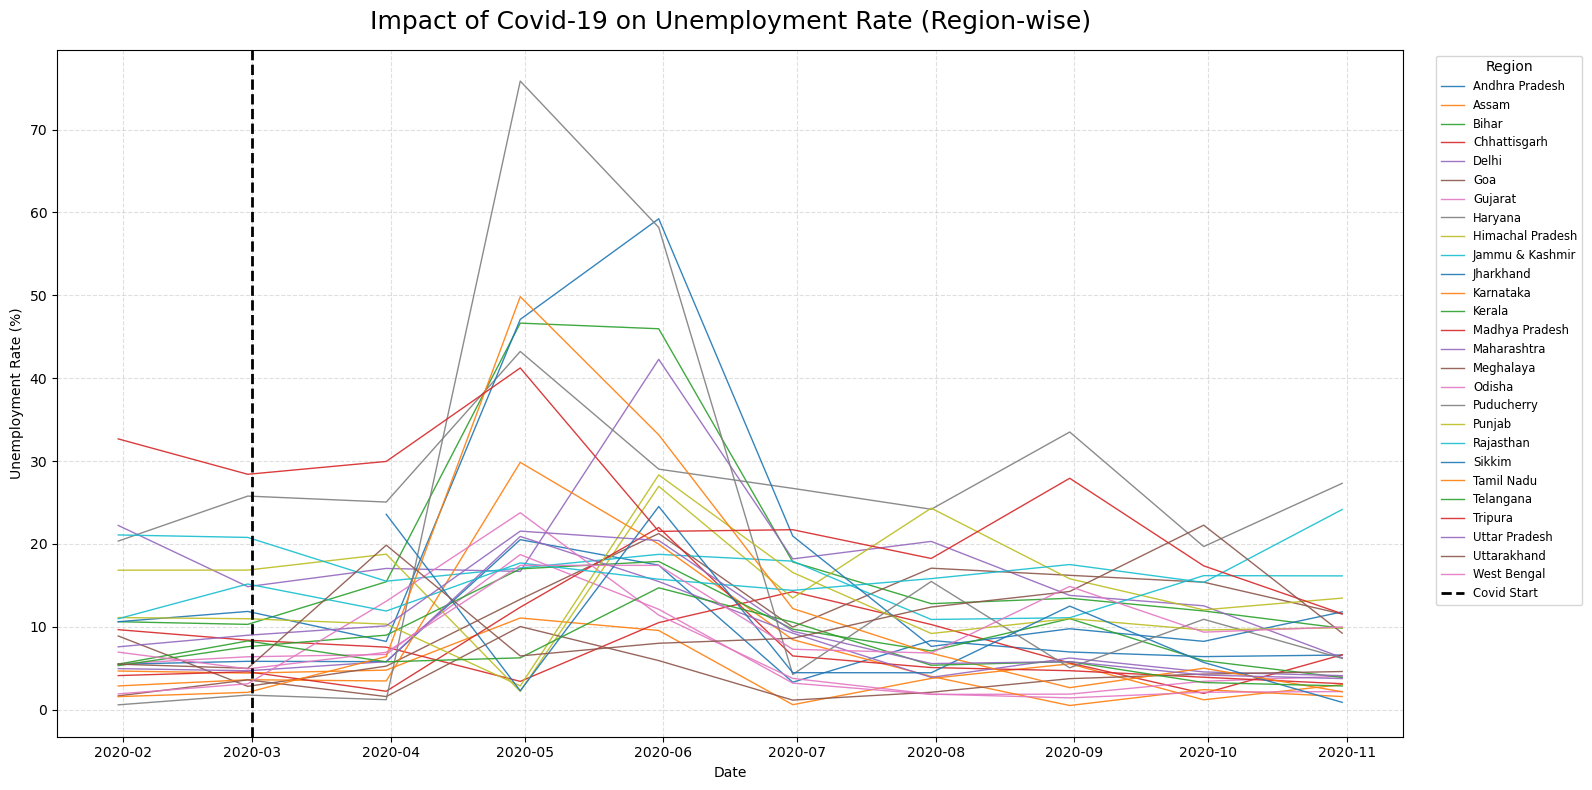

In [10]:
##Covid-19 Impact Analysis
plt.figure(figsize=(16, 8))

for region in unemp_covid['Region'].unique():
    region_df = unemp_covid[unemp_covid['Region'] == region]

    plt.plot(
        region_df['Date'],
        region_df['Estimated Unemployment Rate (%)'],
        linewidth=1,
        alpha=0.9,
        label=region
    )

# Covid start reference line
plt.axvline(
    pd.to_datetime('2020-03-01'),
    linestyle='--',
    color='black',
    linewidth=2,
    label='Covid Start'
)

plt.title('Impact of Covid-19 on Unemployment Rate (Region-wise)', fontsize=18, pad=15)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')

plt.grid(True, linestyle='--', alpha=0.4)

plt.legend(
    title='Region',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='small'
)

plt.tight_layout()
plt.show()

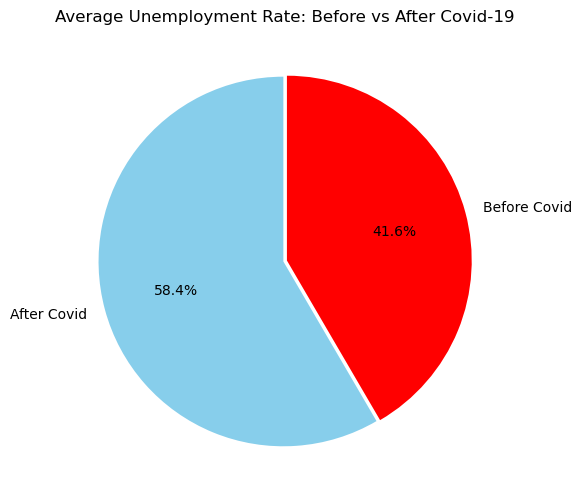

In [19]:
#Before vs After Covid Comparison 
# Create a 'Period' column
unemp_covid['Period'] = unemp_covid['Date'].apply(
    lambda x: 'Before Covid' if x < pd.Timestamp('2020-03-01') else 'After Covid'
)

# Aggregate average unemployment rates
avg_unemp = unemp_covid.groupby('Period')['Estimated Unemployment Rate (%)'].mean()

# Pie chart
plt.figure(figsize=(6,6))
colors = ['skyblue', 'red']
plt.pie(
    avg_unemp,
    labels=avg_unemp.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.01,0.01)
)
plt.title('Average Unemployment Rate: Before vs After Covid-19', fontsize=12)
plt.show()

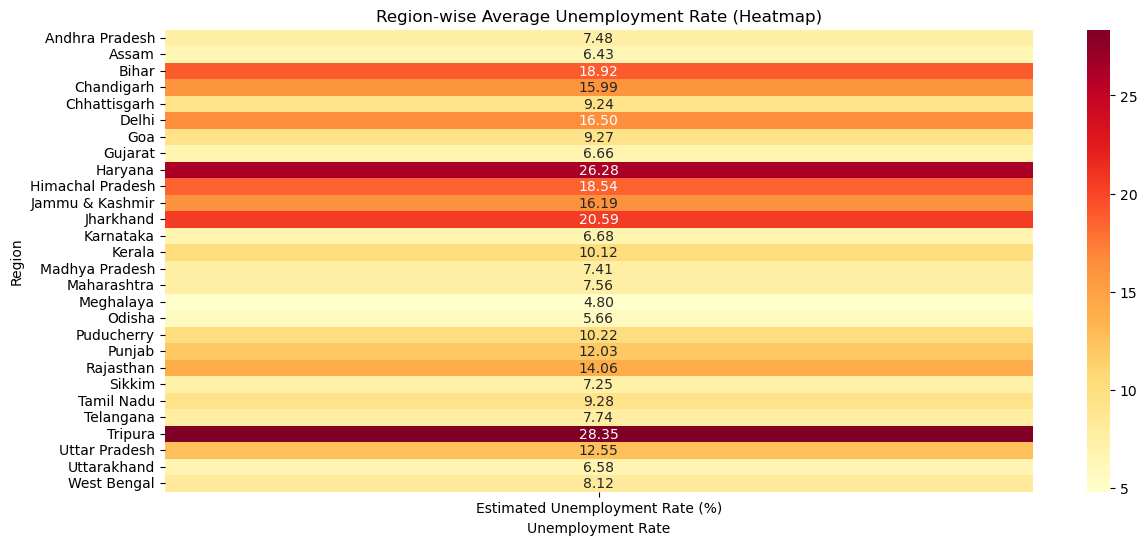

In [12]:
#Region-wise Unemployment Analysis
#Heatmap
plt.figure(figsize=(14,6))

#create pivot table (average unemployment rate per region)
heatmap_data = unemp.pivot_table(
    values='Estimated Unemployment Rate (%)',
    index='Region',
    aggfunc='mean'
)

sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Region-wise Average Unemployment Rate (Heatmap)')
plt.xlabel('Unemployment Rate')
plt.ylabel('Region')
plt.show()

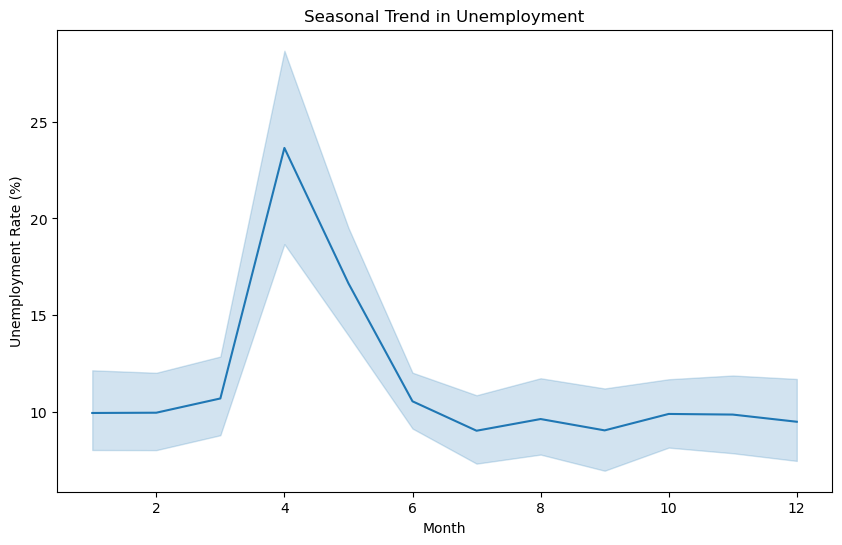

In [13]:
#Seasonal Trends Analysis
unemp['Month'] = unemp['Date'].dt.month

plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=unemp)
plt.title('Seasonal Trend in Unemployment')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.show()